In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
data = pd.read_excel('Data Analyst Assignment (1).xlsx')

In [167]:
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [168]:
data.shape

(16834, 16)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
Date                    16834 non-null datetime64[ns]
product                 16834 non-null object
phase                   16834 non-null object
campaign_platform       16834 non-null object
campaign_type           16834 non-null object
communication_medium    16834 non-null object
subchannel              16834 non-null object
audience_type           16834 non-null object
creative_type           16834 non-null object
creative_name           16834 non-null object
device                  16834 non-null object
age                     16834 non-null object
spends                  16834 non-null float64
impressions             16834 non-null int64
clicks                  16834 non-null int64
link_clicks             16288 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(11)
memory usage: 2.1+ MB


#### Feature Description:
* Platform: Marketing platforms on which campaigns are running majorly: Google Ads and Facebook Ads 
* Type: Type of campaign, In this data only Google search and Facebook Conversion campaigns have boon considered
* Medium: The way we are connecting to people in our Marketing campaigns either via some Keywords or Creatives.
* Sub Channel: Sub channel is under Google Search which type of keywords have been targeted or in Facebook which on subchannel we are targeting
* Audience: Multiple Type of audiences are getting targeted in different campaigns an dthose have been encrypted as Audience 1,2,3
* Creative: This if for facebook what type of Image/Video/Carousel we are using in our Ads.

In [170]:
data.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [171]:
print(list(data.columns))

['Date', 'product', 'phase', 'campaign_platform', 'campaign_type', 'communication_medium', 'subchannel', 'audience_type', 'creative_type', 'creative_name', 'device', 'age', 'spends', 'impressions', 'clicks', 'link_clicks']


In [172]:
data.isnull().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

* We have 546 null values in link_clicks
* Since link_clicks is a key feature for our analysis, we can remove the rows with null values in this feature.
* And we droped the date column because it's not of much use.

In [173]:
data = data.drop(['Date'], axis=1)

In [174]:
data = data.dropna()

In [175]:
data.shape

(16288, 15)

In [176]:
data.head()

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


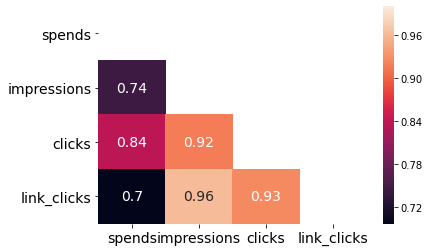

In [177]:
mask1 = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask1)
mask1[triangle_indices] = True

sns.heatmap(data.corr(),mask=mask1, annot =True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [178]:
data.shape

(16288, 15)

# Preliminary data analysis

In [179]:
data.corr()

,spends,impressions,clicks,link_clicks
spends,1.000000,0.744762,0.837970,0.697201
impressions,0.744762,1.000000,0.917821,0.963108
clicks,0.837970,0.917821,1.000000,0.925588
link_clicks,0.697201,0.963108,0.925588,1.000000


In [180]:
data.campaign_platform.value_counts()

Google Ads      15101
Facebook Ads     1187
Name: campaign_platform, dtype: int64

In [181]:
data.age.value_counts()

25-34           3067
35-44           2768
Undetermined    2586
18-24           2472
45-54           2316
65 or more      1558
55-64           1521
Name: age, dtype: int64

In [182]:
data.audience_type.value_counts()

'-            15101
Audience 1      606
Audience 2      488
Audience 3       93
Name: audience_type, dtype: int64

In [217]:
data.creative_type.value_counts()

'-          15101
Image         829
Carousal      358
Name: creative_type, dtype: int64

In [218]:
data.creative_name.value_counts()

'-          15101
Click         515
Carousal      358
Girl          314
Name: creative_name, dtype: int64

In [185]:
data.campaign_type.value_counts()

Search         15101
Conversions     1187
Name: campaign_type, dtype: int64

In [186]:
data.communication_medium.value_counts()

Search Keywords    15101
Creative            1187
Name: communication_medium, dtype: int64

In [187]:
data.subchannel.value_counts()

Brand           7853
Generic         4544
Competitor      2704
Facebook Ads    1187
Name: subchannel, dtype: int64

In [188]:
data.device.value_counts()

Mobile     7357
Desktop    6318
Tablet     1426
device     1187
Name: device, dtype: int64

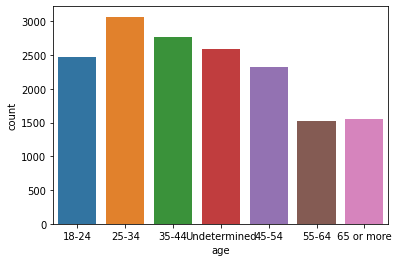

In [211]:
sns.countplot(data.age)
plt.show()

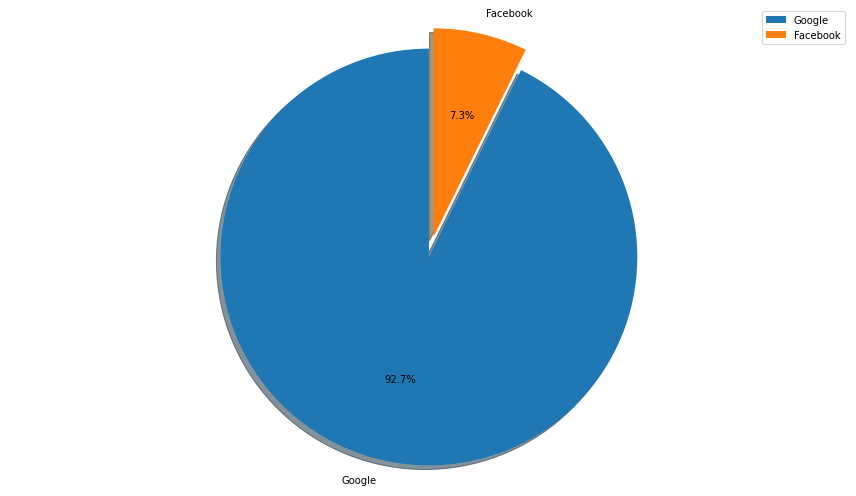

In [190]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['campaign_platform'].value_counts(), explode=explode,labels=['Google', 'Facebook'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

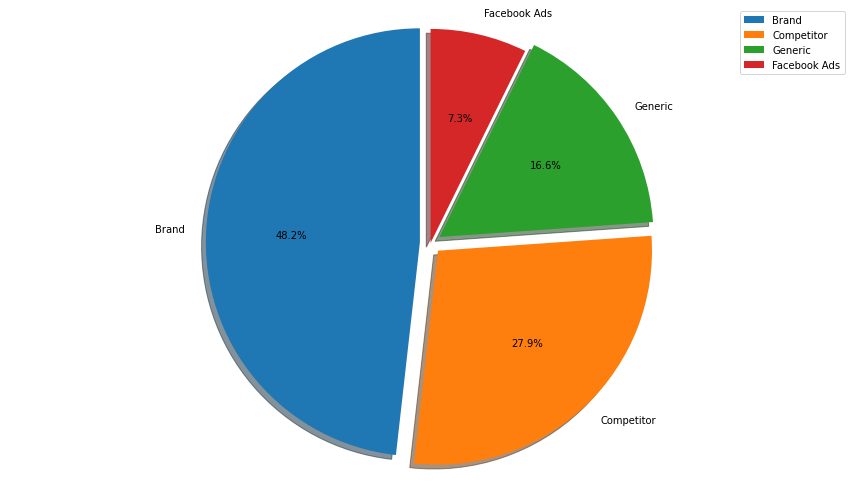

In [247]:
explode = (0.05,0.05,0.05,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['subchannel'].value_counts(), explode=explode,labels=['Brand','Competitor','Generic', 'Facebook Ads'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

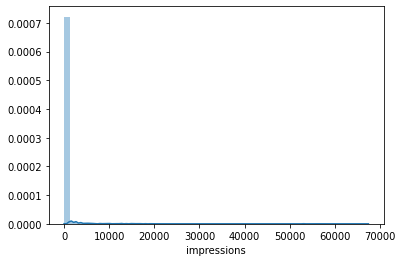

In [192]:
sns.distplot(data.impressions)
plt.show()

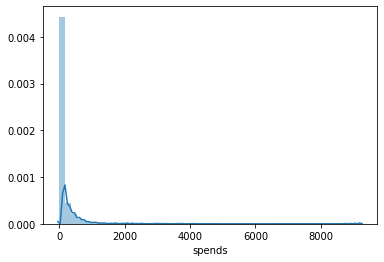

In [193]:
sns.distplot(data.spends)
plt.show()

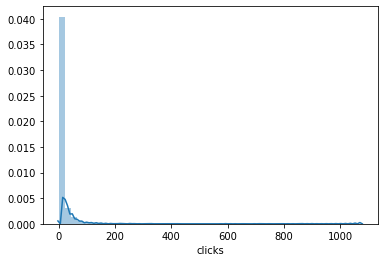

In [195]:
sns.distplot(data.clicks)
plt.show()

# Data Analysis

In [198]:
# Cost analysis
print('Campaign wise clicks')
print((data.groupby(['campaign_platform'])).clicks.sum())
print('-------------------------')


print('Campaign wise amount spent')
print((data.groupby(['campaign_platform'])).spends.sum())
print('------------------------')

print('Campaign wise impression')
print((data.groupby(['campaign_platform'])).impressions.sum())
print('============================')



Campaign wise clicks
campaign_platform
Facebook Ads     77414
Google Ads      124065
Name: clicks, dtype: int64
-------------------------
Campaign wise amount spent
campaign_platform
Facebook Ads    5.622649e+05
Google Ads      1.939003e+06
Name: spends, dtype: float64
------------------------
Campaign wise impression
campaign_platform
Facebook Ads    4052762
Google Ads       776893
Name: impressions, dtype: int64


In [202]:
Facebook_Ads_clicks = 77414
Facebook_Ads_cost = 5.622649e+05
Facebook_Ads_impressions = 4052762

Facebook_Ads_cpc = (Facebook_Ads_cost/Facebook_Ads_clicks)
Facebook_Ads_cpi = (Facebook_Ads_cost/Facebook_Ads_impressions)


print('The cost per click of Facebook Ads is ' + str(Facebook_Ads_cpc))
print('The cost per impression of Facebook Ads is ' + str(Facebook_Ads_cpi))

The cost per click of Facebook Ads is 7.263090655437002
The cost per impression of Facebook Ads is 0.13873622482642703


In [203]:
Google_Ads_clicks = 124065
Google_Ads_cost = 1.939003e+06
Google_Ads_impressions = 776893

Google_Ads_cpc = (Google_Ads_cost/Google_Ads_clicks)
Google_Ads_cpi = (Google_Ads_cost/Google_Ads_impressions)


print('The cost per click of Google Ads is ' + str(Google_Ads_cpc))
print('The cost per impression of Google Ads is ' + str(Google_Ads_cpi))

The cost per click of Google Ads is 15.628928384314674
The cost per impression of Google Ads is 2.4958430568945786


In [207]:
dfg = data.query('campaign_platform == "Google Ads"')
dfg.head()

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,common,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,common,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,common,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,common,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,common,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [208]:
dfb = data.query('campaign_platform == "Facebook Ads"')
dfb.head()

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
2009,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,25-34,70.28,730,12,9.0
2010,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,35-44,7.66,71,1,1.0
2013,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Image,Click,device,25-34,117.13,638,36,21.0
2014,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Image,Click,device,35-44,20.85,125,4,2.0
2017,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,25-34,37.82,297,8,6.0


In [210]:
# Age analysis

print((data.groupby(['age'])).clicks.sum())
print((data.groupby(['age'])).impressions.count())
print('-------------------------')
print((dfg.groupby(['age'])).clicks.sum())
print((dfg.groupby(['age'])).impressions.count())
print('-------------------------')
print((dfb.groupby(['age'])).clicks.sum())
print((dfb.groupby(['age'])).impressions.count())
print('-------------------------')

age
18-24            28224
25-34           101820
35-44            32281
45-54             8500
55-64             1478
65 or more        1854
Undetermined     27322
Name: clicks, dtype: int64
age
18-24           2472
25-34           3067
35-44           2768
45-54           2316
55-64           1521
65 or more      1558
Undetermined    2586
Name: impressions, dtype: int64
-------------------------
age
18-24           28224
25-34           44053
35-44           16609
45-54            4629
55-64            1374
65 or more       1854
Undetermined    27322
Name: clicks, dtype: int64
age
18-24           2472
25-34           2609
35-44           2380
45-54           2022
55-64           1474
65 or more      1558
Undetermined    2586
Name: impressions, dtype: int64
-------------------------
age
25-34    57767
35-44    15672
45-54     3871
55-64      104
Name: clicks, dtype: int64
age
25-34    458
35-44    388
45-54    294
55-64     47
Name: impressions, dtype: int64
-------------------------


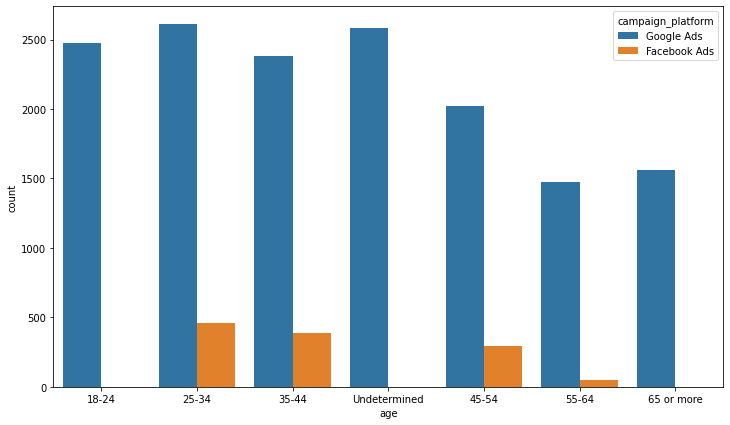

In [212]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['age'],hue=data['campaign_platform'])
plt.show()

In [214]:
print((data.groupby(['device'])).clicks.sum())
print((data.groupby(['device'])).impressions.count())
print('-------------------------')
print((dfg.groupby(['device'])).clicks.sum())
print((dfg.groupby(['device'])).impressions.count())
print('-------------------------')
print((dfb.groupby(['device'])).clicks.sum())
print((dfb.groupby(['device'])).impressions.count())
print('-------------------------')

device
Desktop    29276
Mobile     94348
Tablet       441
device     77414
Name: clicks, dtype: int64
device
Desktop    6318
Mobile     7357
Tablet     1426
device     1187
Name: impressions, dtype: int64
-------------------------
device
Desktop    29276
Mobile     94348
Tablet       441
Name: clicks, dtype: int64
device
Desktop    6318
Mobile     7357
Tablet     1426
Name: impressions, dtype: int64
-------------------------
device
device    77414
Name: clicks, dtype: int64
device
device    1187
Name: impressions, dtype: int64
-------------------------


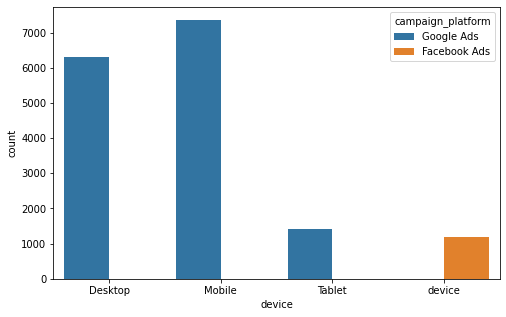

In [191]:
fig1, ax1 = plt.subplots(figsize=(8,5))
sns.countplot(data['device'],hue=data['campaign_platform'])
plt.show()

In [215]:
print((data.groupby(['audience_type'])).clicks.sum())
print((data.groupby(['audience_type'])).impressions.count())
print('-------------------------')
print((dfg.groupby(['audience_type'])).clicks.sum())
print((dfg.groupby(['audience_type'])).impressions.count())
print('-------------------------')
print((dfb.groupby(['audience_type'])).clicks.sum())
print((dfb.groupby(['audience_type'])).impressions.count())
print('-------------------------')

audience_type
Audience 1     61514
Audience 2     14584
Audience 3      1316
common        124065
Name: clicks, dtype: int64
audience_type
Audience 1      606
Audience 2      488
Audience 3       93
common        15101
Name: impressions, dtype: int64
-------------------------
audience_type
common    124065
Name: clicks, dtype: int64
audience_type
common    15101
Name: impressions, dtype: int64
-------------------------
audience_type
Audience 1    61514
Audience 2    14584
Audience 3     1316
Name: clicks, dtype: int64
audience_type
Audience 1    606
Audience 2    488
Audience 3     93
Name: impressions, dtype: int64
-------------------------


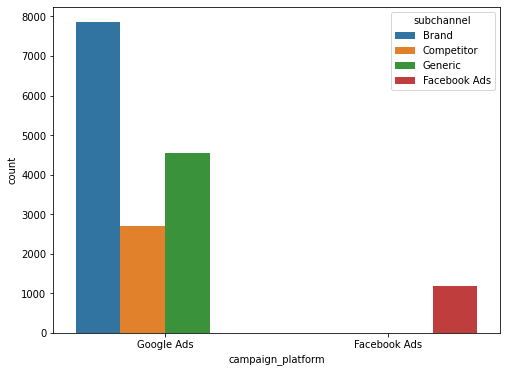

In [222]:
fig1, ax1 = plt.subplots(figsize=(8,6))
sns.countplot(data['campaign_platform'],hue=data['subchannel'])
plt.show()